# Using Trees for Regression

In [3]:
#Importing the neccassry packages 
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [4]:
current_path = os.getcwd()#% Finding current directory of the notebook
current_path =os.path.join(current_path,'fish.csv') # Adding file name at the end of the address
data = pd.read_csv(current_path)# reading csv file given on current_path

# Data pre-processing 

We need to convert Features like Good, medium, Bad, Yes, and No in numerically understandable features.

I converterd these feauters as given below

$Good = 3$,
$Medium = 1$,
$Bad = 1$,
$Yes = 1$,
$No = 0$

The orignal data is replaced with this translated data. It is important to understand that features are required to be converted in a number value to use for training the model. 

In [5]:
ShelveLoc = data['ShelveLoc'].copy()
Urban = data['Urban'].copy()
US = data['US'].copy()

In [6]:
# converting Bad, Medium, and Good to 1,2,and 3. 
Good = np.where(ShelveLoc =='Good',3,0)
Medium = np.where(ShelveLoc =='Medium',2,0)
Bad = np.where(ShelveLoc =='Bad',1,0)
ShelveLoc= Good+Medium+Bad
# Encoding Yes and No as One and Zero
Urban =np.where(Urban =='Yes',1,0)
US =np.where(US =='Yes',1,0)

In [7]:
data["ShelveLoc"] = ShelveLoc
data["Urban"] = Urban
data["US"] = US

# Split the data set into a training set and a test set


In [8]:

fish = data.copy()
print(fish.sample(10))#Displaying 10 random samples from dataset
train, test= train_test_split(fish, test_size=0.2)# Splits data into random test and train samples

     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
197   2.52        124      61            0         333    138          2   76   
158  12.53        142      90            1         189    112          3   39   
57    0.91         93      91            0          22    117          1   75   
3     7.40        117     100            4         466     97          2   55   
37    4.95        121      41            5         412    110          2   54   
226   7.80        119      33            0         245    122          3   56   
302   5.28        108      77           13         388    110          1   74   
392   4.53        129      42           13         315    130          1   34   
293  11.28        123      84            0          74     89          3   59   
102   5.30        113      22            0          57     97          2   65   

     Education  Urban  US  
197         16      1   0  
158         10      0   1  
57          11      1   

In [9]:
#Sample data With Y vector included (Sales)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,3,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,3,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [11]:
#Data preparation
xtrain =train.copy()
xtest = test.copy()
xtrain.drop(['Sales'],axis=1,inplace=True) #Removing Sales Column
xtest.drop(['Sales'],axis=1,inplace=True)

In [12]:
ytrain = train['Sales'] # taking only the Sales column for train 
ytest= test['Sales'] #Same for test data


In [13]:
ytrain.shape

(320,)

# Fit a regression tree to the training set. Plot the tree and interpret the results.

In [14]:

model = DecisionTreeRegressor() # making a decision tree for regression without limiting depth of tree 
model.fit(xtrain, ytrain) # Learning the tree

DecisionTreeRegressor()

# Plot the tree and interpret the results

In [ ]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(model, out_file=None, feature_names=xtrain.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

In [87]:
import graphviz
data = tree.export_graphviz(model, out_file=None, 
                                feature_names=xtrain.columns,
                                filled=True)

# Draw graph
fig = graphviz.Source(data, format="png") 
fig.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [17]:
text_representation = tree.export_text(model) # text presentation of the tree
print(text_representation)

|--- feature_5 <= 2.50
|   |--- feature_4 <= 96.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_1 <= 42.00
|   |   |   |   |--- feature_6 <= 49.50
|   |   |   |   |   |--- feature_0 <= 123.50
|   |   |   |   |   |   |--- value: [6.68]
|   |   |   |   |   |--- feature_0 >  123.50
|   |   |   |   |   |   |--- value: [7.50]
|   |   |   |   |--- feature_6 >  49.50
|   |   |   |   |   |--- feature_6 <= 64.00
|   |   |   |   |   |   |--- value: [4.42]
|   |   |   |   |   |--- feature_6 >  64.00
|   |   |   |   |   |   |--- value: [3.47]
|   |   |   |--- feature_1 >  42.00
|   |   |   |   |--- feature_3 <= 83.50
|   |   |   |   |   |--- value: [11.18]
|   |   |   |   |--- feature_3 >  83.50
|   |   |   |   |   |--- feature_4 <= 94.00
|   |   |   |   |   |   |--- feature_6 <= 41.50
|   |   |   |   |   |   |   |--- feature_0 <= 103.50
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [8.55]
|   |   |   |   |   |   |   |   |--- feat

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model, xt, yt,
                target_name="target",
                feature_names=xtrain.columns)
viz.save("decision_tree1.svg")

[Text(189.9179103657004, 211.04470588235293, 'X[5] <= 2.5\nmse = 8.099\nsamples = 320\nvalue = 7.511'),
 Text(81.78780632121314, 198.25411764705882, 'X[4] <= 96.5\nmse = 5.875\nsamples = 246\nvalue = 6.697'),
 Text(17.979792225201074, 185.4635294117647, 'X[5] <= 1.5\nmse = 4.369\nsamples = 47\nvalue = 8.728'),
 Text(6.6197050938337805, 172.6729411764706, 'X[1] <= 42.0\nmse = 3.245\nsamples = 17\nvalue = 7.462'),
 Text(3.590348525469169, 159.88235294117646, 'X[6] <= 49.5\nmse = 2.67\nsamples = 4\nvalue = 5.518'),
 Text(1.7951742627345846, 147.09176470588235, 'X[0] <= 123.5\nmse = 0.168\nsamples = 2\nvalue = 7.09'),
 Text(0.8975871313672923, 134.30117647058825, 'mse = 0.0\nsamples = 1\nvalue = 6.68'),
 Text(2.692761394101877, 134.30117647058825, 'mse = 0.0\nsamples = 1\nvalue = 7.5'),
 Text(5.385522788203754, 147.09176470588235, 'X[6] <= 64.0\nmse = 0.226\nsamples = 2\nvalue = 3.945'),
 Text(4.487935656836461, 134.30117647058825, 'mse = 0.0\nsamples = 1\nvalue = 4.42'),
 Text(6.283109919

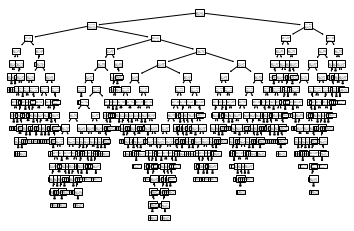

In [19]:
tree.plot_tree(model) # Plotting tree using plot_tree froom scikit-learn

In [20]:
print('The depth of the tree is ',model.tree_.max_depth) # Finding depth of learned tree
print('Number of leaf Nodes is ', model.tree_.node_count) # Finding Leaf Node



The depth of the tree is  16
Number of leaf Nodes is  633


In [21]:
# leaf node Y predictions there are 629 node
for i in range(model.tree_.node_count):
    print('value of the ' + str(i) +'th leaf node is ',model.tree_.value[i]) 

value of the 0th leaf node is  [[7.5113125]]
value of the 1th leaf node is  [[6.69658537]]
value of the 2th leaf node is  [[8.72808511]]
value of the 3th leaf node is  [[7.46235294]]
value of the 4th leaf node is  [[5.5175]]
value of the 5th leaf node is  [[7.09]]
value of the 6th leaf node is  [[6.68]]
value of the 7th leaf node is  [[7.5]]
value of the 8th leaf node is  [[3.945]]
value of the 9th leaf node is  [[4.42]]
value of the 10th leaf node is  [[3.47]]
value of the 11th leaf node is  [[8.06076923]]
value of the 12th leaf node is  [[11.18]]
value of the 13th leaf node is  [[7.80083333]]
value of the 14th leaf node is  [[8.157]]
value of the 15th leaf node is  [[8.6975]]
value of the 16th leaf node is  [[8.165]]
value of the 17th leaf node is  [[8.55]]
value of the 18th leaf node is  [[7.78]]
value of the 19th leaf node is  [[9.23]]
value of the 20th leaf node is  [[9.32]]
value of the 21th leaf node is  [[9.14]]
value of the 22th leaf node is  [[7.79666667]]
value of the 23th l

# What test MSE do you obtain?

In [22]:

y_pred = model.predict(xtest)
error = mean_squared_error(ytest, y_pred)
print(error)

4.9005712500000005


# Using cross-validation in order to determine the optimal level of tree complexity. Implementing pruning of tree to see performance improvement on test data?

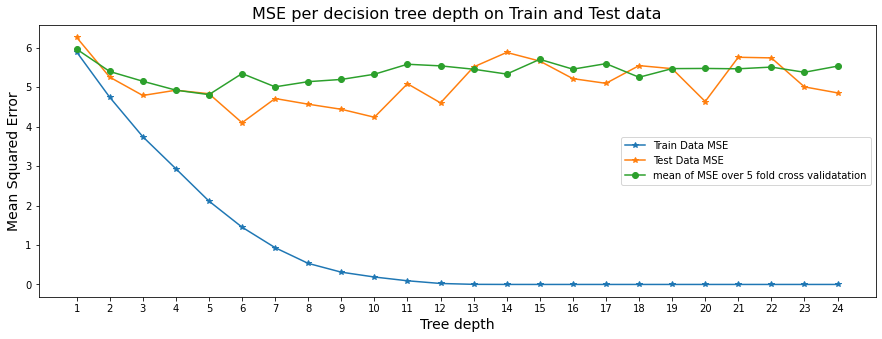

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y,xtest,ytest, t_depths, cv=10, scoring='neg_mean_squared_error'):
    cv_mse_list = []
    cv_mse_mean = []
    mse_train = []
    mse_test = []
    for d in t_depths:
        t_model = DecisionTreeRegressor(max_depth=d)
        cv_mse = cross_val_score(t_model, X, y, cv=cv, scoring=scoring)
        cv_mse_list.append(-1*cv_mse)
        cv_mse_mean.append(cv_mse.mean())
        mse_train.append(mean_squared_error(t_model.fit(X, y).predict(X), y))
        mse_test.append(mean_squared_error(t_model.predict(xtest), ytest))
    mse_test = np.array(mse_test)  
    mse_train = np.array(mse_train)
    cv_mse_list = np.array(cv_mse_list)
    cv_mse_mean = -1*np.array(cv_mse_mean)
    return mse_train,mse_test,cv_mse_list,cv_mse_mean
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, MSE,cv_mse_mean,mse_test, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    #ylim = plt.ylim()
    ax.plot(depths, MSE, '-*', label='Train Data MSE')
    ax.plot(depths, mse_test, '-*', label='Test Data MSE')
    ax.plot(depths, cv_mse_mean, '-o',label='mean of MSE over 5 fold cross validatation')
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Mean Squared Error', fontsize=14)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
tree_depths = range(1,25)
mse_train,mse_test,cv_scores_list,cv_mse_mean = run_cross_validation_on_trees(xtrain, 
                                                                              ytrain,xtest,ytest,tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(tree_depths, mse_train,cv_mse_mean,mse_test,
                               'MSE per decision tree depth on Train and Test data')


    
 

In [27]:
d= np.argmin(mse_test)+1 # Depth of tree where the test error is minimum
print(d)

6


In [29]:
tree_depths

range(1, 25)

In [30]:
min(mse_test)

4.097980753656231

# Does pruning the tree improve the test MSE?

In [31]:
# using Depth of tree which we found through cross validation and claculating Test error
t_model = DecisionTreeRegressor(max_depth=d)
t_model.fit(xtrain, ytrain)
y_pred = t_model.predict(xtest)
error = mean_squared_error(ytest, y_pred)

print(error)

4.304103253656232


In [32]:
print(d)

6


# Yes it improves the test error,
Previously it was $5.9341375$ with the treee depth of $17$ and now  with just depth of $8$ it has $5.1264460615262$  MSE for the test data.
The values of depth and error difference may change but after trying multiple times It was evident the with even less depth of tree the the regression tree performance is promising for the test data. 

# Use of bagging approach in order to analyse the data. Comparting test MSE 

In [33]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(n_estimators=10, random_state=0).fit(xtrain,ytrain)
y_pred = regr.predict(xtest)
error = mean_squared_error(ytest, y_pred)
print(error)

2.224944825


# AS expected 
The test MSE is reduced from $5.126445$ to $2.2526461$ when the ensembel weak learner as used to make a complex learner 

# Use of random forest to analyse the data. Comparting test MSE

In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=11, random_state=0).fit(xtrain,ytrain)
y_pred = regr.predict(xtest)
error = mean_squared_error(ytest, y_pred)
print(error)

2.0397387498457786


# Test Error $1.9493065621851837$
As we know that Random Forest de-correlates the individual learners and employes baggign on the top. So expectation were that it will reduce the error. The test MSE with bagging approach was $2.2526$ which with Random Forest reduces to $1.94931$